In [12]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [14]:
data = np.loadtxt('data1' , dtype = 'f4,f4,f4')
#print(data)

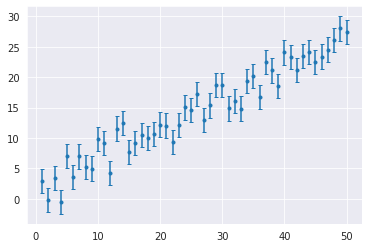

In [19]:
data = np.asarray([list(d) for d in data])
x = data[:,0]
y = data[:,1]
sigma = data[:,2]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.errorbar(x,y,yerr=sigma , fmt='.' , capsize =2)
plt.show()

In [21]:
def point_multiply(x1,x2):
    x = [x1*x2 for x1,x2 in zip(x1,x2)]
    return(x)

In [25]:
s = sum([1/(sig**2) for sig in sigma])
sum_x = sum([(xi/(sigma_i**2)) for xi , sigma_i in zip(x,sigma)])
sum_x = sum([(xi/(sigma_i**2)) for xi , sigma_i in zip(y,sigma)])
sum_x_sq = sum([(xi**2/(sigma_i**2)) for xi , sigma_i in zip(x,sigma)])
sum_x_y = sum([(xi*yi/(sigma_i**2)) for xi ,yi, sigma_i in zip(x,y,sigma)])

In [27]:
denom = s*sum_x_sq - (sum_x**2)
a1 = (sum_y*sum_x_sq - sum_x*sum_x_y)/denom
a2 = ( s*sum_x_y - sum_x*sum_y ) /denom
print(a1,a2)

65.52110895371011 -0.55004034066007


In [29]:
def linear_model(x,a1,a2):
    val = a1+a2*x
    return(val)

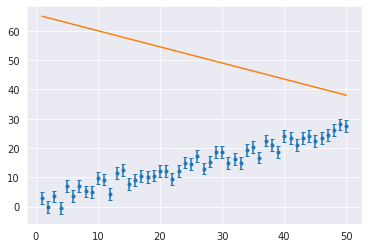

In [33]:
y_mod = linear_model(x,a1,a2)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.errorbar(x,y,yerr=sigma , fmt='.' , capsize =2)
ax.plot(x,y_mod)
plt.show()